In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import os

In [6]:
target_path = './test images+masks/masks/'
model_path = './test images+masks/NF_pred/masks/'
images_path = './test images+masks/images/'

In [7]:
def get_images(directory):
    images = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        print(filepath)
        img = plt.imread(filepath)      
        plt.imshow(img)
        plt.show()
        images.append(img)
    return images

./test images+masks/masks/0001.png


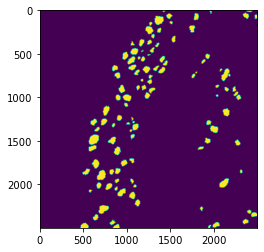

./test images+masks/masks/0010.png


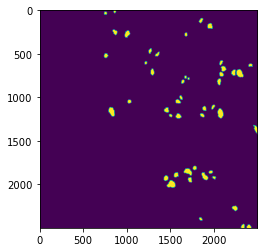

./test images+masks/NF_pred/masks/0001.png


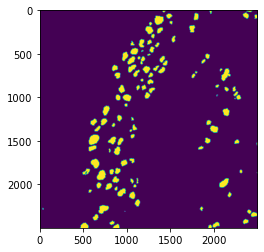

./test images+masks/NF_pred/masks/0010.png


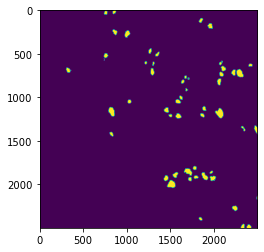

./test images+masks/images/0001.tif


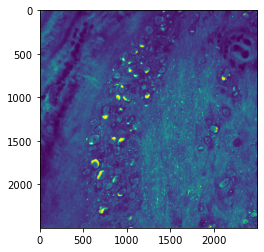

./test images+masks/images/0010.tif


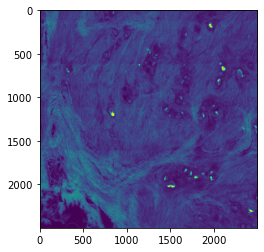

In [8]:
targets = get_images(target_path)
model_images = get_images(model_path)
images = get_images(images_path)

### Intersection over Union (IoU)

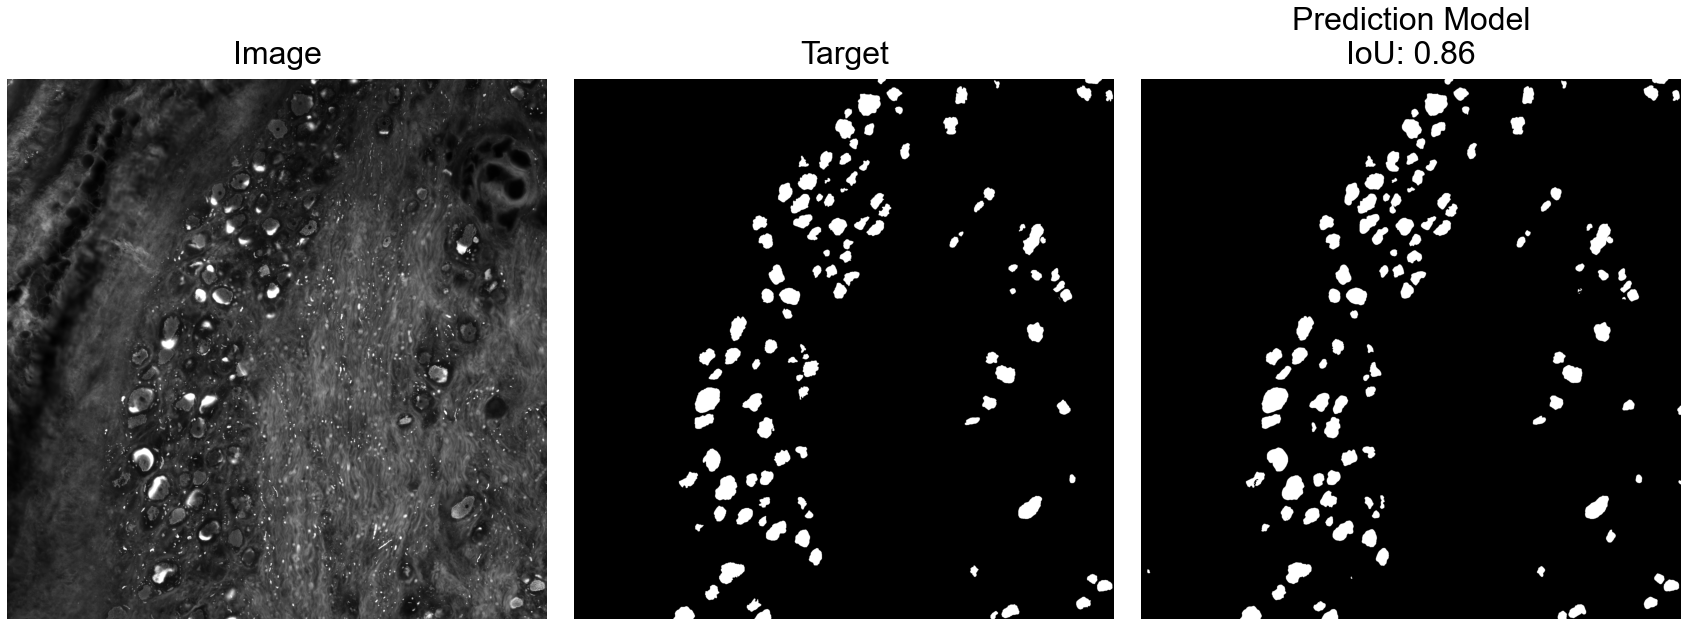

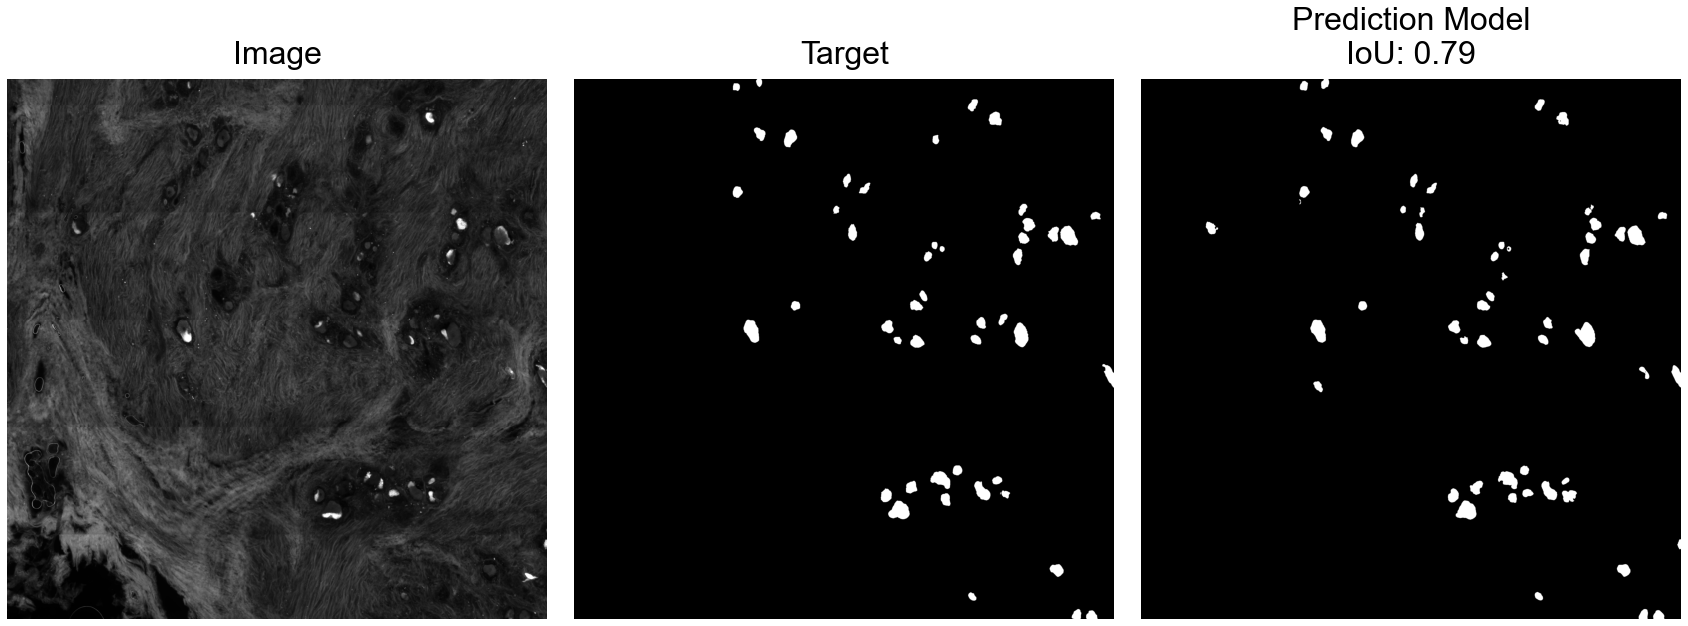

In [9]:
count = 0
for image, target, prediction_model in zip(images, targets, model_images):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,15))
    ax1.set_title('Image', fontsize=32, pad=15, fontname='Arial')
    ax1.imshow(image, cmap='gray')
    ax1.set_axis_off()
    ax2.set_title('Target', fontsize=32, pad=15, fontname='Arial')
    ax2.imshow(target, cmap='gray')
    ax2.set_axis_off()
    model_score = metrics.jaccard_score(
        (target>0.5).reshape(-1), 
        (prediction_model>0.5).reshape(-1))
    ax3.set_title('Prediction Model\n'+'IoU: '+"{:.2f}".format(model_score), fontsize=32, pad=15, fontname='Arial')
    ax3.imshow(prediction_model, cmap='gray')
    ax3.set_axis_off()
    plt.subplots_adjust(wspace=0.05)
    count +=1
    #plt.savefig('Test_Image '+str(count))
    plt.show()

#### Dice

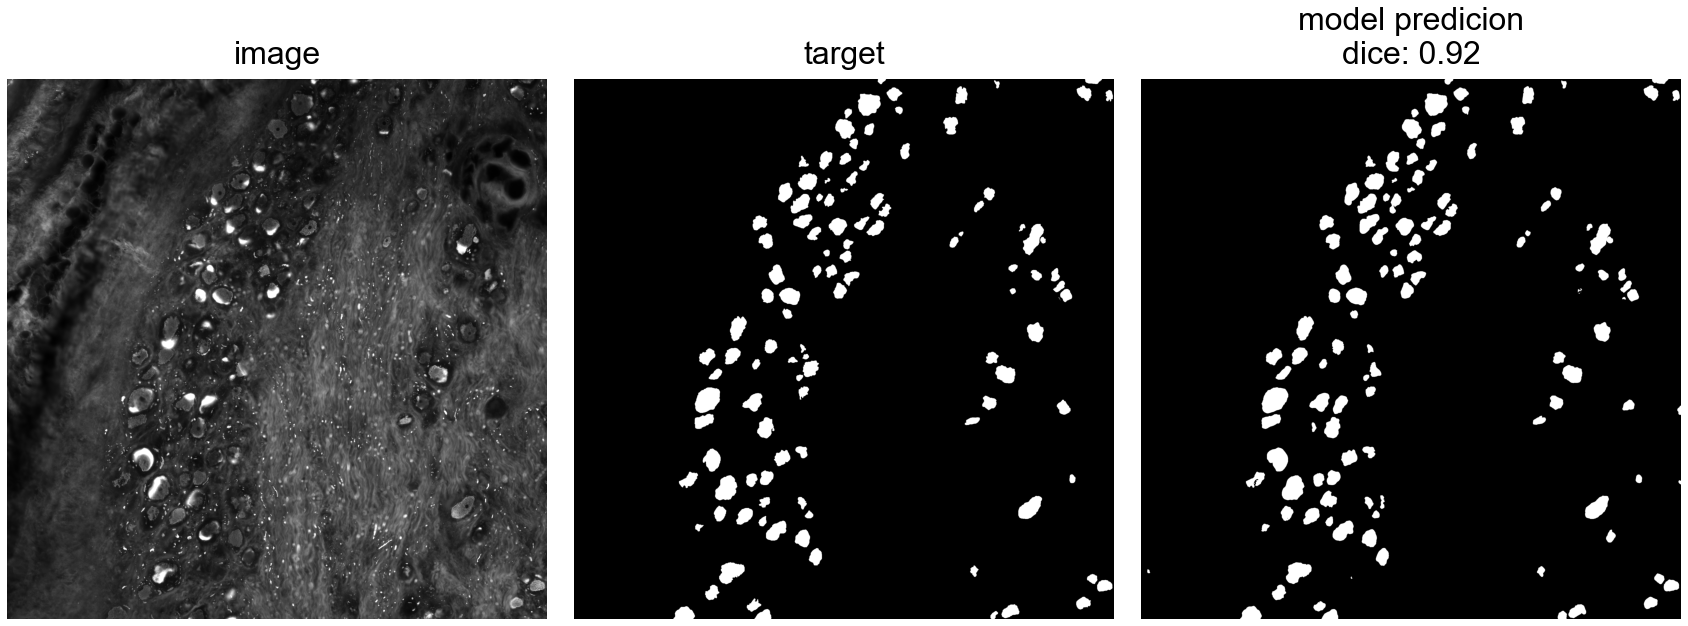

0.9244394862864606


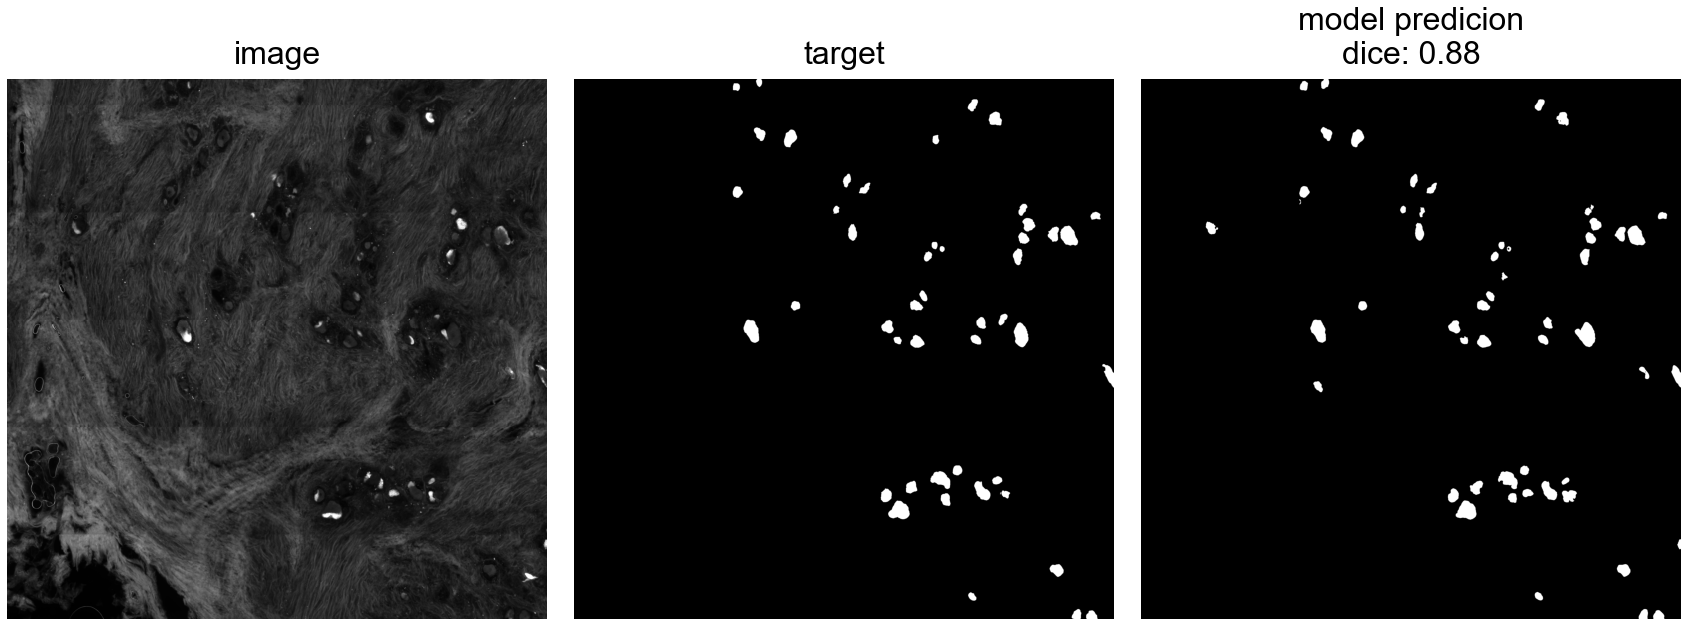

0.8816853160673449


In [15]:
count = 0
for image, target, prediction_model in zip(images, targets, model_images):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,15))
    ax1.set_title('image', fontsize=32, pad=15, fontname='Arial')
    ax1.imshow(image, cmap='gray')
    ax1.set_axis_off()
    ax2.set_title('target', fontsize=32, pad=15, fontname='Arial')
    ax2.imshow(target, cmap='gray')
    ax2.set_axis_off()
    model_score = np.sum(prediction_model[target==1])*2.0 / (np.sum(prediction_model) + np.sum(target))
    ax3.set_title('model predicion\n'+'dice: '+"{:.2f}".format(model_score), fontsize=32, pad=15, fontname='Arial')
    ax3.imshow(prediction_model, cmap='gray')
    ax3.set_axis_off()
    plt.subplots_adjust(wspace=0.05)
    count +=1
    plt.savefig('Test_Image '+str(count))
    plt.show()
    print(model_score)
